In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data (1).csv')
num_plays = data['play_id']

In [20]:
play_types = data['play_type'].unique()
play_types

array(['DHO', 'Iso', 'Ball Screen', 'Initiation', 'Closeout', 'Off-Cut',
       'Off-Move', 'Post', 'Backcourt', 'Transition', 'Rim Gather',
       'Short Roll', 'Paint Gather', 'Fake DHO', 'Perim Gather',
       'Mid Gather', 'Downhill', 'Inbounds'], dtype=object)

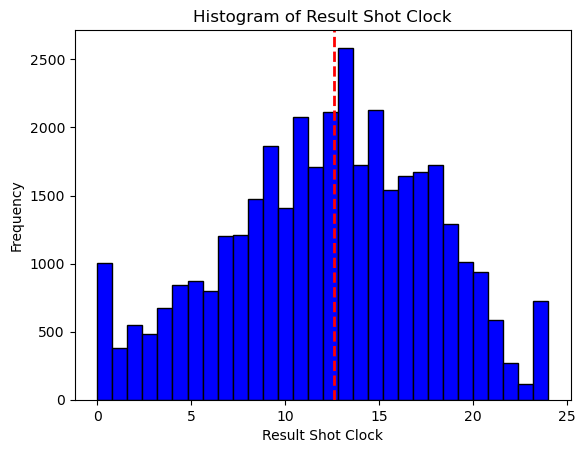

In [21]:
non_null_values = data['result_shotclock'].dropna()

plt.hist(non_null_values, bins=30, color='blue', edgecolor='black')

median_value = non_null_values.median()

plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_value}')
plt.xlabel('Result Shot Clock')
plt.ylabel('Frequency')
plt.title('Histogram of Result Shot Clock')

# Show the plot
plt.show()

In [22]:
median_value

12.6

In [23]:
zone_types = data['play_sis_zone'].unique()
zone_types

array(['Right Above Break 3', 'Mid-Right Midrange',
       'Mid-Right Above Break 3', 'Right Midrange',
       'Mid-Right Deep Paint', 'Short Backcourt', 'Mid-Left Deep Paint',
       'Mid-Left Above Break 3', 'Right Short Mid', 'Deep Backcourt',
       'Left Corner 3', 'Left Short Mid', 'Left Above Break 3',
       'Mid-Left Midrange', 'Rim', 'Mid-Left Short Paint',
       'Left Midrange', 'Right Corner 3', 'Mid-Right Short Paint', nan],
      dtype=object)

In [24]:
contest_types = data['result_contest'].unique()
contest_types

array([nan, 'Plus', 'Average', 'Fouled', 'Poor', 'Alter', 'Block', 'Open',
       'Goaltend'], dtype=object)

In [25]:
data.head(5)

,ï»¿filename,nba_game_id,game_date,home_team,away_team,quarter,poss_id,poss_type,off_team,def_team,...,result_num,result_type,result_contest,result_gameclock,result_shotclock,player_x,player_y,result_pts,play_sis_zone,result_dist
0,DET_MIL_20221031_Q1.xml,22200100,10/31/22 0:00,MIL,DET,1,1,Halfcourt,MIL,DET,...,NaN,NaN,NaN,NaN,NaN,28.72,-19.61,NaN,Right Above Break 3,NaN
1,DET_MIL_20221031_Q1.xml,22200100,10/31/22 0:00,MIL,DET,1,1,Halfcourt,MIL,DET,...,NaN,NaN,NaN,NaN,NaN,24.75,-9.47,NaN,Mid-Right Midrange,NaN
2,DET_MIL_20221031_Q1.xml,22200100,10/31/22 0:00,MIL,DET,1,1,Halfcourt,MIL,DET,...,NaN,NaN,NaN,NaN,NaN,20.97,-11.14,NaN,Mid-Right Above Break 3,NaN
3,DET_MIL_20221031_Q1.xml,22200100,10/31/22 0:00,MIL,DET,1,1,Halfcourt,MIL,DET,...,1.0,TOV,NaN,705.2,10.1,26.41,-18.99,0.0,Right Above Break 3,25.793805
4,DET_MIL_20221031_Q1.xml,22200100,10/31/22 0:00,MIL,DET,1,2,Halfcourt,DET,MIL,...,NaN,NaN,NaN,NaN,NaN,-19.41,19.95,NaN,Right Above Break 3,NaN


In [26]:
result_type_types = data['result_type'].unique()
result_type_types

array([nan, 'TOV', 'Layup', 'Catch & Shoot', '1-2D Pull-Up',
       'Semi Off-Move', 'Dunk', 'Hard Off-Move', 'Floater', '3+D Pull-Up',
       'Leaner', 'Off-Lob / Tip', 'Post Fade', 'Face-Up', 'Hook',
       'Take FT', 'Take Side', 'PU Fade', 'Side Out', 'SC Violation',
       'Putback', 'Jump Ball'], dtype=object)

In [31]:
result_types_to_exclude = ['NaN', 'TOV', 'Take FT', 'Jump Ball']

# Creating a new DataFrame by excluding rows with specified 'result_type' values
shots = data[~data['result_type'].isin(result_types_to_exclude)].copy()
shots = shots.dropna(subset=['result_type']).copy()
shots

,ï»¿filename,nba_game_id,game_date,home_team,away_team,quarter,poss_id,poss_type,off_team,def_team,...,result_num,result_type,result_contest,result_gameclock,result_shotclock,player_x,player_y,result_pts,play_sis_zone,result_dist
11,DET_MIL_20221031_Q1.xml,22200100,10/31/22 0:00,MIL,DET,1,4,Halfcourt,MIL,DET,...,1.0,Layup,Plus,678.24,9.6,20.60,-16.31,2.0,Right Above Break 3,0.000000
16,DET_MIL_20221031_Q1.xml,22200100,10/31/22 0:00,MIL,DET,1,5,Halfcourt,DET,MIL,...,1.0,Catch & Shoot,Average,663.36,12.1,-16.69,2.79,0.0,Mid-Right Above Break 3,24.849260
17,DET_MIL_20221031_Q1.xml,22200100,10/31/22 0:00,MIL,DET,1,5,Halfcourt,DET,MIL,...,1.0,Catch & Shoot,Average,663.36,12.1,-30.43,4.30,0.0,Mid-Right Deep Paint,24.849260
18,DET_MIL_20221031_Q1.xml,22200100,10/31/22 0:00,MIL,DET,1,6,Halfcourt,MIL,DET,...,1.0,Layup,Fouled,652.24,16.0,22.41,-18.89,2.0,Right Above Break 3,4.838616
19,DET_MIL_20221031_Q1.xml,22200100,10/31/22 0:00,MIL,DET,1,6,Halfcourt,MIL,DET,...,1.0,Layup,Fouled,652.24,16.0,23.95,-9.69,2.0,Mid-Right Midrange,4.838616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116286,TOR_DET_20221114_Q4.xml,22200199,11/14/22 0:00,DET,TOR,4,46,Halfcourt,DET,TOR,...,1.0,Layup,Block,20.60,14.9,18.64,13.99,0.0,Mid-Left Above Break 3,1.000000
116287,TOR_DET_20221114_Q4.xml,22200199,11/14/22 0:00,DET,TOR,4,46,Halfcourt,DET,TOR,...,1.0,Layup,Block,20.60,14.9,19.40,11.09,0.0,Mid-Left Above Break 3,1.000000
116290,TOR_DET_20221114_Q4.xml,22200199,11/14/22 0:00,DET,TOR,4,48,Secondary,DET,TOR,...,1.0,Face-Up,Average,10.60,0.0,12.67,9.32,3.0,Mid-Left Above Break 3,26.148212
116291,TOR_DET_20221114_Q4.xml,22200199,11/14/22 0:00,DET,TOR,4,48,Secondary,DET,TOR,...,1.0,Face-Up,Average,10.60,0.0,20.93,-2.87,3.0,Mid-Right Midrange,26.148212


In [41]:
defensive_shots = shots[shots['off_def'] == 'DEF'].copy()
defensive_shots = defensive_shots.dropna(subset=['result_contest']).copy()
defensive_shots

,ï»¿filename,nba_game_id,game_date,home_team,away_team,quarter,poss_id,poss_type,off_team,def_team,...,result_num,result_type,result_contest,result_gameclock,result_shotclock,player_x,player_y,result_pts,play_sis_zone,result_dist
17,DET_MIL_20221031_Q1.xml,22200100,10/31/22 0:00,MIL,DET,1,5,Halfcourt,DET,MIL,...,1.0,Catch & Shoot,Average,663.36,12.1,-30.43,4.30,0.0,Mid-Right Deep Paint,24.849260
19,DET_MIL_20221031_Q1.xml,22200100,10/31/22 0:00,MIL,DET,1,6,Halfcourt,MIL,DET,...,1.0,Layup,Fouled,652.24,16.0,23.95,-9.69,2.0,Mid-Right Midrange,4.838616
27,DET_MIL_20221031_Q1.xml,22200100,10/31/22 0:00,MIL,DET,1,8,Halfcourt,MIL,DET,...,1.0,Semi Off-Move,Plus,630.72,16.6,21.56,-0.52,0.0,Mid-Right Midrange,25.390638
39,DET_MIL_20221031_Q1.xml,22200100,10/31/22 0:00,MIL,DET,1,9,Halfcourt,DET,MIL,...,1.0,1-2D Pull-Up,Plus,618.52,14.2,-24.28,4.92,0.0,Mid-Right Midrange,24.997140
44,DET_MIL_20221031_Q1.xml,22200100,10/31/22 0:00,MIL,DET,1,11,Halfcourt,DET,MIL,...,1.0,1-2D Pull-Up,Plus,595.92,14.4,-24.52,6.75,0.0,Mid-Right Midrange,24.657222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116265,TOR_DET_20221114_Q4.xml,22200199,11/14/22 0:00,DET,TOR,4,43,Halfcourt,TOR,DET,...,1.0,1-2D Pull-Up,Average,77.60,11.2,-27.58,15.75,0.0,Right Midrange,24.697208
116273,TOR_DET_20221114_Q4.xml,22200199,11/14/22 0:00,DET,TOR,4,43,Halfcourt,TOR,DET,...,2.0,Hook,Fouled,64.32,4.5,-30.67,9.17,2.0,Right Short Mid,2.064098
116285,TOR_DET_20221114_Q4.xml,22200199,11/14/22 0:00,DET,TOR,4,45,Halfcourt,TOR,DET,...,1.0,1-2D Pull-Up,Plus,34.22,1.6,-25.64,2.54,0.0,Mid-Right Midrange,18.822797
116287,TOR_DET_20221114_Q4.xml,22200199,11/14/22 0:00,DET,TOR,4,46,Halfcourt,DET,TOR,...,1.0,Layup,Block,20.60,14.9,19.40,11.09,0.0,Mid-Left Above Break 3,1.000000


In [42]:
result_contest_types = defensive_shots['result_contest'].unique()
result_contest_types

array(['Average', 'Fouled', 'Plus', 'Alter', 'Block', 'Poor', 'Open',
       'Goaltend'], dtype=object)